# Johnson-LIndenstrauss Algorithm

In this notebook, we are going to use a powerful result from the field of Dimensionality Reduction to embed points from a high dimensional vector space to a low dimensional space and try to preserve pairwise Eucledian distances between all the points.

The lemma states that a set of points in a high-dimensional space can be embedded into a space of much lower dimension in such a way that distances between the points are nearly preserved. To be precise, given $0 < \epsilon 1$, and a set $X$ of $m$ points in $\mathbb{R}^N$ and a number $k = \Omega(\ln(m)/\epsilon^2)$, there is a linear map $f: \mathbb{R}^N \rightarrow \mathbb{R}^n$ such that,
$$(1 - \epsilon){\| u - v \|}^2 \leq {\|f(u) - f(v)\|}^2 \leq (1 + \epsilon){\| u - v \|}^2$$

In [1]:
# Import libraries
%matplotlib inline
import math
import random
import numpy as np
from numpy import linalg as LA
from sklearn.datasets.samples_generator import make_blobs

/Users/nightshade/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# parameters

epsilon = random.randint(1, 50)/100
n = 300 # number of points
d = 100 # original dimension
k = 50  #embedding dimension

## Create a dataset

In [3]:
X, _ = make_blobs(n_samples=n, n_features=d)
x, y = X[random.randint(1, n)], X[random.randint(1, n)]

In [4]:
# Normal distribution

def JL(xx, yy, k):
    '''
    Embeds dataset X to a k dimensional vector space. Appends distortion to yy and k to xx.
    '''
    B = np.random.normal(0, 1, (k, d))
    A = B/math.sqrt(k)
    max_C = 0
    for i in range(len(X)):
        for j in range(i+1, len(X)):
            temp = (LA.norm(np.dot(X[i], A.T)-np.dot(X[j], A.T))**2)/( LA.norm(X[i]-X[j])**2)
            if temp > max_C:
                max_C = temp
    yy.append(max_C)
    xx.append(k)
    return xx, yy
    

## We run our algorithm for different values of k and plot distortion C against embedding dimesion k.

Observe that the embedding dimension $k$ for a given $\epsilon$ does not depend on the original dimensions. It only depends on the number of points in the dataset. 
That makes this lemma seem like pure magic, that you can take data in an arbitrarily high dimension and put it in a much smaller dimension.
In the below plot you can see as you increase the embedding dimension $k$, distortion decreases, or in other words, pairwise distances are better preserved. 


In [5]:
xx = []
yy = []
for i in range(10, n, 10):
    xx, yy = JL(xx, yy, i)

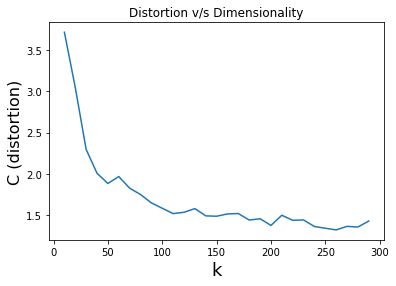

In [6]:
import matplotlib.pylab as plt
plt.plot(xx, yy)
plt.ylabel('C (distortion)', fontsize=16)
plt.xlabel('k', fontsize=18)
plt.title('Distortion v/s Dimensionality')
plt.show()

## Part c.
Instead of sampling from the standard normal distribution, we use -1/+1 with equal probabilities to create our matrix B. Achlioptas in [this](https://www.sciencedirect.com/science/article/pii/S0022000003000254) work shows that, instead of using Gaussians, one can pick the entries of A to be uniformly and independently drawn from
{1, -1} and achieve the same bound for $k$. Furthermore, using a sparse matrix with entries filled with {0, -1, 1} with non-zero entries filled with -1/1 with equal probabilities also gives you the same bound. (Theorem 1.1 below is from the aforementioned [paper](https://www.sciencedirect.com/science/article/pii/S0022000003000254)).
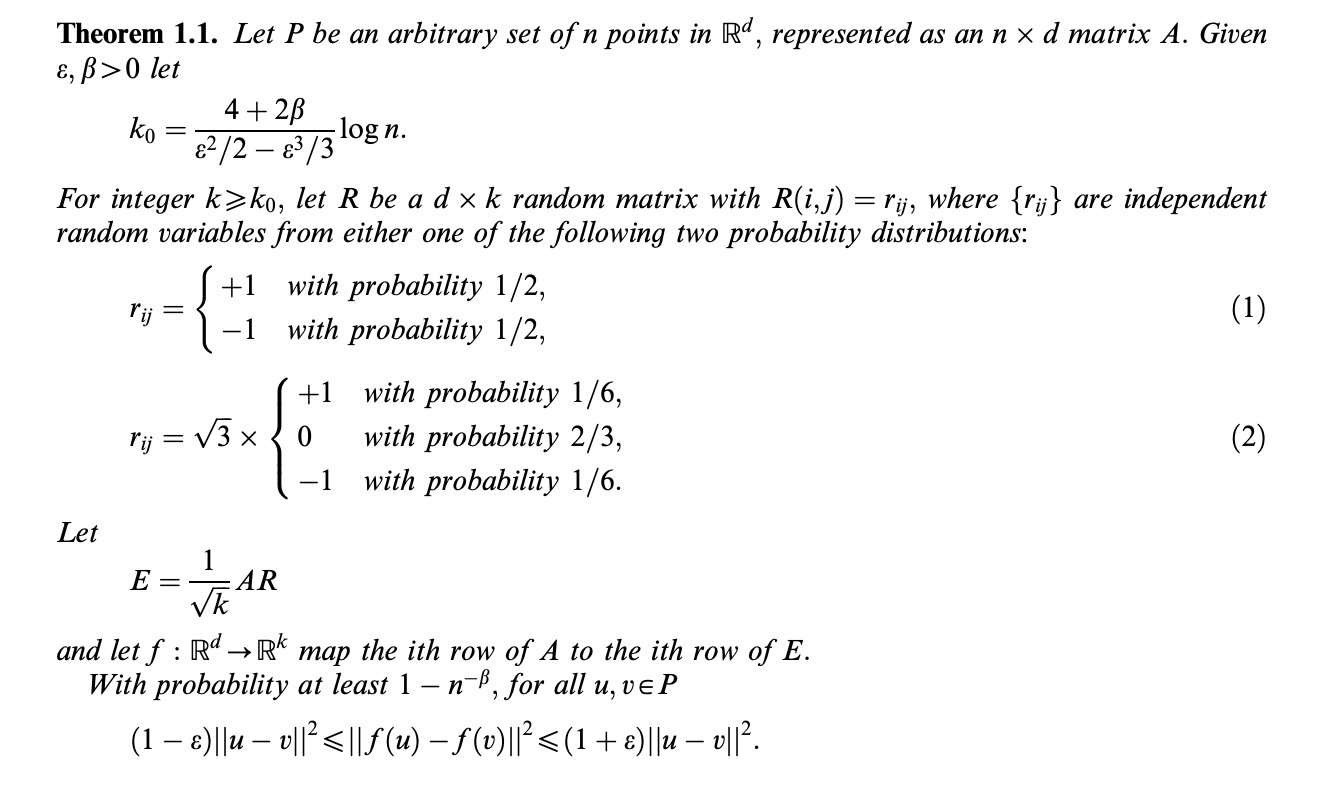

Here, we verify this result experimentally. We see that using {-1, 1} instead of Gaussians does not affect our results and results in similar distortion vs embedding dimension curve.

Note that, the extra credit question asks you to confirm result 2 in above Theorem where we sample from {0, -1, 1} with approximately 2/3 of the entries filled with zeros.

In [7]:
# +1/-1 random variable

def JL_(xx, yy, k):
    B = np.random.choice([-1, 1], (k, d))
    A = B/math.sqrt(k)
    max_C = 0
    for i in range(len(X)):
        for j in range(i+1, len(X)):
            temp = (LA.norm(np.dot(X[i], A.T)-np.dot(X[j], A.T))**2)/( LA.norm(X[i]-X[j])**2)
            if temp > max_C:
                max_C = temp
    yy.append(max_C)
    xx.append(k)
    return xx, yy

In [8]:
xx = []
yy = []
for i in range(10, n, 10):
    xx, yy = JL_(xx, yy, i)

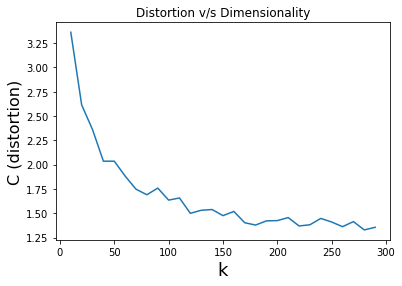

In [9]:
import matplotlib.pylab as plt
plt.plot(xx, yy)
plt.ylabel('C (distortion)', fontsize=16)
plt.xlabel('k', fontsize=18)
plt.title('Distortion v/s Dimensionality')
plt.show()